In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [2]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape) # 50000, 32, 32, 3

# Normalize: 0,255 -> 0,1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 21s 0us/step
(50000, 32, 32, 3)


In [3]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

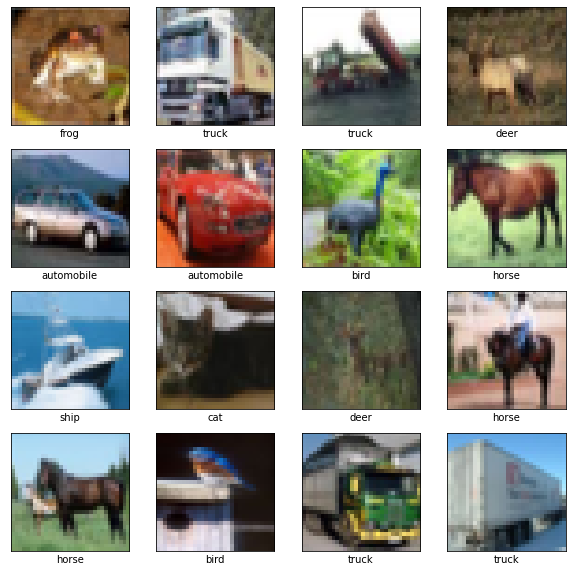

In [4]:
show()

In [5]:
# model...
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())
#import sys; sys.exit()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [6]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

C:\Users\fabian\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
# training
batch_size = 64
epochs = 5

model.fit(train_images, train_labels, epochs=epochs,
          batch_size=batch_size, verbose=2)

Epoch 1/5
782/782 - 24s - loss: 1.5825 - accuracy: 0.4302 - 24s/epoch - 31ms/step
Epoch 2/5
782/782 - 23s - loss: 1.2328 - accuracy: 0.5665 - 23s/epoch - 30ms/step
Epoch 3/5
782/782 - 23s - loss: 1.1150 - accuracy: 0.6081 - 23s/epoch - 30ms/step
Epoch 4/5
782/782 - 23s - loss: 1.0298 - accuracy: 0.6420 - 23s/epoch - 29ms/step
Epoch 5/5
782/782 - 23s - loss: 0.9726 - accuracy: 0.6605 - 23s/epoch - 29ms/step


In [8]:
# evaulate
model.evaluate(test_images,  test_labels, batch_size=batch_size, verbose=2)

157/157 - 1s - loss: 1.0140 - accuracy: 0.6522 - 1s/epoch - 9ms/step


[1.0139951705932617, 0.6521999835968018]